In [36]:
import torch
import torchvision.transforms as transforms
import PIL
import os,glob
import matplotlib.pylab as plt
import numpy as np
import IPython.display as ipd

In [18]:
root = '/home/data2/kbh/WIDER_FACE'
root_val = os.path.join(root,'WIDER_val')

In [19]:
list_val = glob.glob(os.path.join(root_val,'**','*.jpg'),recursive=True)
print(len(list_val))

3226


## Load

(679, 1024, 3)


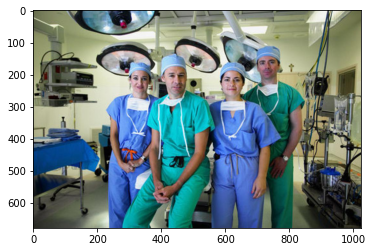

In [31]:
img = PIL.Image.open(list_val[0])
print(np.shape(img))
plt.imshow(img)
plt.show()

## PT

torch.Size([3, 679, 1024])
torch.Size([3, 512, 512])


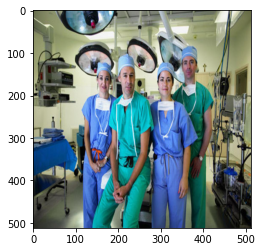

In [33]:
convert2pt = transforms.ToTensor()

pt = convert2pt(img)
print(pt.shape)
resize = transforms.Resize ((512,512))

scaled = resize(pt)
print(scaled.shape)

npy = scaled.detach().numpy()
plt.imshow(np.transpose(npy,(1,2,0)))
plt.show()

## Augmentation
https://www.analyticsvidhya.com/blog/2021/04/10-pytorch-transformations-you-need-to-know/

```python
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
crop = transforms.CenterCrop((200,100))
rand_flip = transforms.RandomHorizontalFlip(p=0.9)
blur = transforms.GaussianBlur(kernel_size=501)
rand_apply = transform = transforms.RandomApply([transforms.RandomSizedCrop(200),transforms.RandomHorizontalFlip()],p=0.6)
bright = transforms.functional.adjust_brightness(image,brightness_factor=2)
contra = transforms.functional.adjust_contrast(image,contrast_factor=3.8)
hue = transforms.functional.adjust_hue(image,hue_factor=0.3)
satu = transforms.functional.adjust_saturation(image,saturation_factor=6)
sharp = transforms.functional.adjust_sharpness(image,sharpness_factor=10)
```

In [43]:
def show(x,label):
    ipd.display(ipd.Markdown('## '+ str(label)))
    npy = x.detach().numpy()
    plt.imshow(np.transpose(npy,(1,2,0)))
    plt.show()

## input

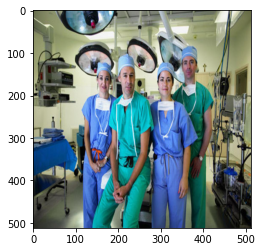

In [62]:
show(scaled,'input')

## normalize

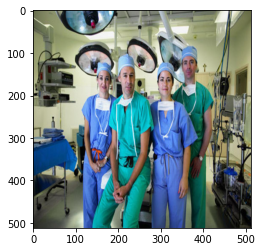

In [63]:
normalize = transforms.Normalize((0,0, 0), (1, 1, 1))
o1 = normalize(scaled)
show(o1,'normalize')

## crop

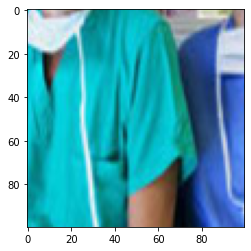

In [64]:
crop = transforms.CenterCrop((100,100))
o1 = crop(scaled)
show(o1,'crop')

## rand_flip

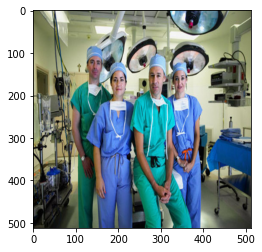

In [65]:
rand_flip = transforms.RandomHorizontalFlip(p=0.9)
o1 = rand_flip(scaled)
show(o1,'rand_flip')


## blur

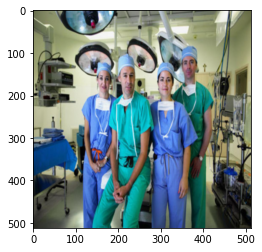

In [85]:
blur = transforms.GaussianBlur(kernel_size=15)
o1 = blur(scaled)
show(o1,'blur')

## bright

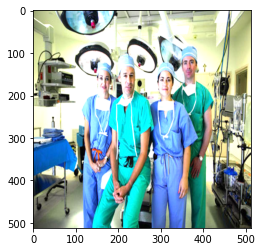

In [89]:
o1 = transforms.functional.adjust_brightness(scaled,brightness_factor=1.5)
show(o1,'bright')

## contra

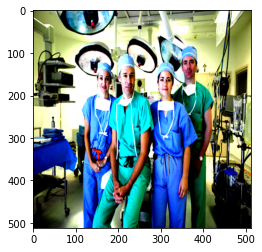

In [93]:
contra = transforms.functional.adjust_contrast(scaled,contrast_factor=2)
show(contra,'contra')

## hue

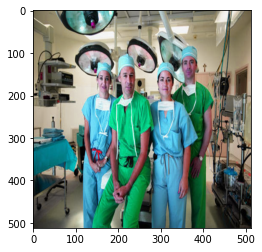

In [110]:
hue = transforms.functional.adjust_hue(scaled,hue_factor=-0.07)
show(hue,'hue')

## satu

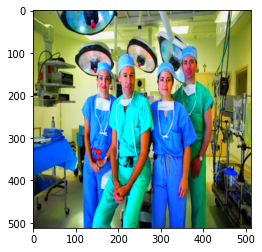

In [116]:
satu = transforms.functional.adjust_saturation(scaled,saturation_factor=2.5)
show(satu,'satu')

## sharp

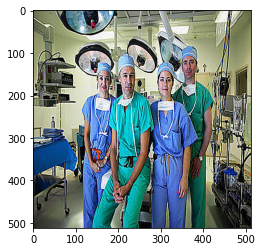

In [119]:
sharp = transforms.functional.adjust_sharpness(scaled,sharpness_factor=10)
show(sharp,'sharp')

In [ ]:
rand_apply = transform = transforms.RandomApply([transforms.RandomSizedCrop(200),transforms.RandomHorizontalFlip()],p=0.6)

contra = transforms.functional.adjust_contrast(image,contrast_factor=3.8)
hue = transforms.functional.adjust_hue(image,hue_factor=0.3)
satu = transforms.functional.adjust_saturation(image,saturation_factor=6)
sharp = transforms.functional.adjust_sharpness(image,sharpness_factor=10)